In [115]:
#seth hensley
#80105592
#homework 1.b

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

alpha = .00000001
iterations = 50


theta = np.zeros(12)
dataset = pd.read_csv("C:\\Users\\shens\\Desktop\\Housing.csv")
dataset.head(),dataset.shape

dataset.guestroom.replace(('yes', 'no'), (1, 0), inplace=True)
dataset.mainroad.replace(('yes', 'no'), (1, 0), inplace=True)
dataset.basement.replace(('yes', 'no'), (1, 0), inplace=True)
dataset.hotwaterheating.replace(('yes', 'no'), (1, 0), inplace=True)
dataset.airconditioning.replace(('yes', 'no'), (1, 0), inplace=True)
dataset.prefarea.replace(('yes', 'no'), (1, 0), inplace=True)

dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [116]:
x1= dataset.values[:,1]
x2= dataset.values[:,2]
x3= dataset.values[:,3]
x4= dataset.values[:,4]
x5= dataset.values[:,5]
x6= dataset.values[:,6]
x7= dataset.values[:,7]
x8= dataset.values[:,8]
x9= dataset.values[:,9]
x10= dataset.values[:,10]
x11= dataset.values[:,11]
Y = dataset.values[:,0]

m = len(Y)

x0 = np.ones((m,1))
x1 =x1.reshape(m,1)
x2 =x2.reshape(m,1)
x3 =x3.reshape(m,1)
x4 =x4.reshape(m,1)
x5 =x5.reshape(m,1)
x6 =x6.reshape(m,1)
x7 =x7.reshape(m,1)
x8 =x8.reshape(m,1)
x9 =x9.reshape(m,1)
x10 =x10.reshape(m,1)
x11 =x11.reshape(m,1)

X = np.hstack((x0,x1,x2,x3,x4,x5, x6, x7, x8, x9, x10, x11))
X,m


(array([[1.0, 7420, 4, ..., 1, 2, 1],
        [1.0, 8960, 4, ..., 1, 3, 0],
        [1.0, 9960, 3, ..., 0, 2, 1],
        ...,
        [1.0, 3620, 2, ..., 0, 0, 0],
        [1.0, 2910, 3, ..., 0, 0, 0],
        [1.0, 3850, 3, ..., 0, 0, 0]], dtype=object),
 545)

In [117]:
from sklearn.model_selection import train_test_split

xTrain,xTest,yTrain,yTest = train_test_split(X,Y,test_size = .2, random_state = 50)
mtrain = len(xTrain)
mtrain,xTrain

(436,
 array([[1.0, 1905, 5, ..., 0, 0, 0],
        [1.0, 8250, 3, ..., 0, 2, 0],
        [1.0, 4400, 4, ..., 1, 2, 1],
        ...,
        [1.0, 5850, 2, ..., 0, 2, 0],
        [1.0, 6615, 4, ..., 0, 1, 0],
        [1.0, 3480, 3, ..., 0, 1, 0]], dtype=object))

In [118]:
def findLoss(X, Y, theta):
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

#error = findLoss(X, Y, theta)

In [119]:
def gradientDescentLOSS(X, Y, theta, alpha, iterations, m, xTest, yTest):
    
    cost_history = np.zeros(iterations)
    cost_historyTest = np.zeros(iterations)
    for i in range(iterations): 
        predictions = X.dot(theta) 
        errors = np.subtract(predictions, Y) 
        sum_delta = (alpha / m) * X.transpose().dot(errors); 
        theta = theta - sum_delta;
        cost_history[i] = findLoss(X, Y, theta)
        cost_historyTest[i] = findLoss(xTest,yTest,theta)
    return theta, cost_history, cost_historyTest

In [120]:
thetatrain, losstrain2, losstest2 = gradientDescentLOSS(xTrain,yTrain,theta,alpha,iterations, mtrain,xTest,yTest)
thetatrain, losstrain,losstest2


(array([0.3337602264733615, 844.2890713600991, 1.1347621224274043,
        0.5846081491276361, 0.881912218307253, 0.3041011887373342,
        0.09250266657288513, 0.1741914922860541, 0.03805188398237211,
        0.21272436438749023, 0.2663791917928633, 0.13057879343959555],
       dtype=object),
 array([9.97330521e+12, 9.43582659e+12, 8.93216594e+12, ...,
        1.43099794e+12, 1.43099793e+12, 1.43099793e+12]),
 array([1.38156505e+12, 8.15232956e+11, 5.38893590e+11, 4.01315347e+11,
        3.31053010e+11, 2.94051618e+11, 2.73876917e+11, 2.62464845e+11,
        2.55771573e+11, 2.51713511e+11, 2.49182073e+11, 2.47566043e+11,
        2.46515766e+11, 2.45823991e+11, 2.45363896e+11, 2.45055762e+11,
        2.44848390e+11, 2.44708358e+11, 2.44613575e+11, 2.44549316e+11,
        2.44505702e+11, 2.44476077e+11, 2.44455944e+11, 2.44442255e+11,
        2.44432945e+11, 2.44426612e+11, 2.44422302e+11, 2.44419368e+11,
        2.44417370e+11, 2.44416008e+11, 2.44415080e+11, 2.44414446e+11,
        

Text(0.5, 1.0, 'Convergence of gradient descent')

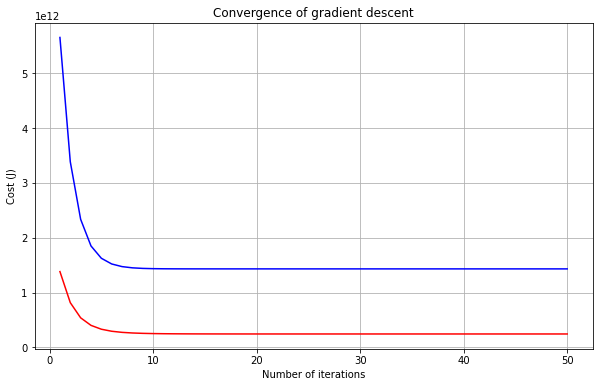

In [121]:
plt.plot(range(1, iterations + 1),losstrain2, color='blue') 
plt.plot(range(1, iterations + 1),losstest2, color='red') 

plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 